# **Online Shoppers Purchasing Intention**

**Data Scientist Team 6 - Majestic** :
- Faiz Naida
- Fajar Arief
- Melani Hariono
- Refi Fadholi
- Riswan Setiawan
- Shanna Sinaga
- Tegar Theo

---

# **STAGE 2 - Data Preprocessing**

# **0. Load Dataset**

In [1]:
# import library yang dibutuhkan

import pandas as pd 
import numpy as np                     #untuk kalkulasi mathematic
import seaborn as sns                  #Untuk visualisasi data
import matplotlib.pyplot as plt        #Untuk plotting graphs 
from matplotlib import rcParams
%matplotlib inline
import warnings                        #Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")

In [2]:
# load dataset

url = 'https://drive.google.com/file/d/1UJ07j4gSGHTDpw53wO3L2y4eoXesZbMN/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

#mengimpor dataset
df = pd.read_csv(dwn_url)

In [3]:
# membagi feature berdasarkan value numerik dan kategori 

cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
nums = ['Administrative', 'Administrative_Duration','Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']  

# **1. Data Cleaning**
---

### **A ) Handle Missing Values**

In [4]:
# melihat jumlah missing value disetiap feature

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Tidak ada nilai yang kosong pada kolom**, sehingga tidak dilakukan handling missing value.

### **B ) Handle Duplicated Data**

In [5]:
# melihat jumlah duplikat

df.duplicated().sum()

125

In [6]:
df[df.duplicated(keep=False) == True]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [7]:
print(f'Jumlah row duplicated SEBELUM dihapus {df.duplicated().sum()}')

# menghapus duplikat

df.drop_duplicates(inplace=True)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')

Jumlah row duplicated SEBELUM dihapus 125
Jumlah row duplicated SETELAH dihapus 0


In [8]:
# inisiasi update datadrame

df = df.drop_duplicates().reset_index(drop = True)

### **C ) Handle Outliers**

In [9]:
#Cek outlier

from scipy import stats
filtered_entries = np.array([True] * len(df))

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in nums:
    zscore = abs(stats.zscore(df[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df1 = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')
print(f'Prsentase outlier: {round((len(df)-len(df1))/len(df)*100, 2)}%')


Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020
Prsentase outlier: 17.9%


Presentase outlier dalam data 17.90%, nilai tersebut cukup besar, maka outlier tidak dihilangkan. Tidak dilakukan handle juga karena outlier ini bukan dari kesalahan dalam pengambilan data.

# **2. Feature Engineering**
---

### **A ) Feature Transformation**

Transformasi feature tidak menggunakan log karena data memiliki banyak value dengan nilai 0. PowerTransformer Yeo-Johnson dipilih untuk membuat distribusi lebih mendekati normal (Guassian) dan mendukung value data memiliki nilai positif atau negatif.

In [10]:
# transformasi data

from sklearn.preprocessing import PowerTransformer

for x in nums:
    pt = PowerTransformer(method='yeo-johnson')
    df[x] = pt.fit_transform(df[x].to_frame())

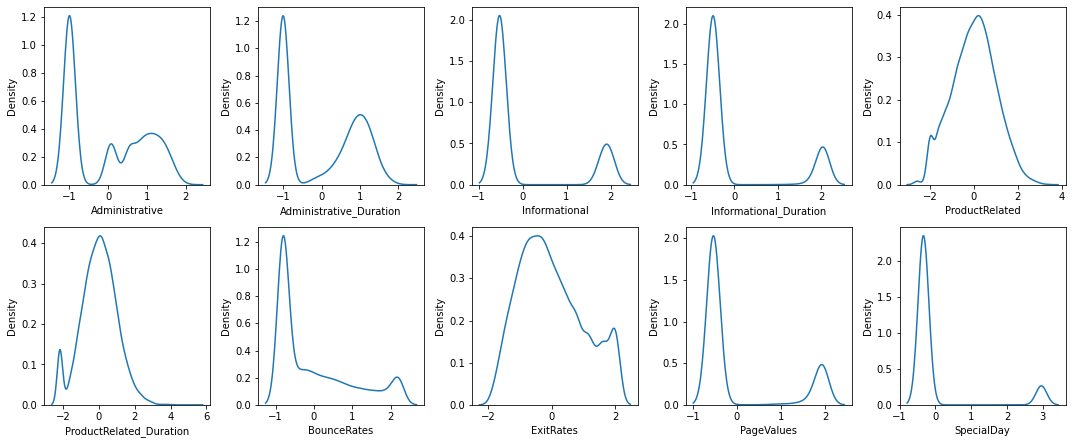

In [11]:
# cek distribusi data

features = nums
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [12]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9612,-0.998474,-1.005468,-0.523851,-0.494799,0.678255,0.520108,1.555867,0.866561,-0.532801,-0.33763,Dec,1,1,1,2,Returning_Visitor,False,False
1146,-0.998474,-1.005468,-0.523851,-0.494799,-1.366868,-1.288501,-0.802948,0.200527,-0.532801,-0.33763,Mar,2,4,1,10,Returning_Visitor,False,False
7125,-0.998474,-1.005468,-0.523851,-0.494799,-1.007465,-0.418043,2.217189,1.992155,-0.532801,-0.33763,Oct,3,2,8,20,Returning_Visitor,False,False
9212,1.282480,1.102080,-0.523851,-0.494799,0.376630,-0.048927,0.402856,0.254949,-0.532801,-0.33763,Dec,1,8,1,2,Returning_Visitor,False,False
10214,-0.998474,-1.005468,-0.523851,-0.494799,-0.466390,-0.260882,-0.802948,-0.309131,-0.532801,-0.33763,Dec,2,2,3,2,New_Visitor,True,False


### **B ) Feature Encoding**

**Handle Feature VisitorType**

In [13]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

Value `Other` diinisiai kedalam `ReturningVisitor` (modus).

In [14]:
df['VisitorType'].replace('Other', 'Returning_Visitor', inplace=True)

**Update Feature Kategori**

In [15]:
cats_updated = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [16]:
for col in cats_updated:
    print(f'Value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value counts of column Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
------------------------------ 

Value counts of column OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
------------------------------ 

Value counts of column Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64
------------------------------ 

Value counts of column Region
1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64
------------------------------ 

Value counts of column TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40

**Strategi Encoding**:
> OperatingSystems, Browser, Region, TrafficType sudah memiliki feature numerik <br>
> Month akan dilakukan label encoding <br>
> VisitorType, Weekend, dan Revenue akan dilakukan One Hot Encoding <br>

#### **Label Encoding**

In [17]:
# membuat label peringkat berdasarkan jumlah peringkat user dari yang terbesar

month = df['Month'].value_counts().reset_index()
month_df = pd.DataFrame(month)
month_df['Month'] = (month_df['Month'].rank(ascending=False)).astype(int)
month_df

,index,Month
0,May,1
1,Nov,2
2,Mar,3
3,Dec,4
4,Oct,5
5,Sep,6
6,Aug,7
7,Jul,8
8,June,9
9,Feb,10


In [18]:
# mapping ke dataframe (run kode 1 x)

mapping_month = month_df.set_index('index')['Month'].to_dict()

df['Month'] = df['Month'].map(mapping_month)

In [19]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8150,1.753252,1.365510,1.979993,2.065551,2.353353,2.533335,-0.247876,-0.599359,1.841464,-0.33763,2,2,4,3,1,Returning_Visitor,True,True
10565,0.550281,1.163200,1.992722,2.064130,2.333573,2.267488,-0.593773,-0.479995,1.886327,-0.33763,2,2,2,1,2,Returning_Visitor,False,True
8050,-0.998474,-1.005468,1.807721,2.035768,1.533721,1.057081,-0.781313,-0.929440,-0.532801,-0.33763,2,2,2,1,2,Returning_Visitor,False,True
3832,-0.998474,-1.005468,-0.523851,-0.494799,-1.169325,-0.795490,-0.802948,1.298150,-0.532801,-0.33763,1,4,1,3,3,Returning_Visitor,True,False
7257,-0.998474,-1.005468,-0.523851,-0.494799,-0.249840,0.245051,2.213946,1.981189,-0.532801,-0.33763,7,3,2,4,13,Returning_Visitor,False,False


#### **One Hot Encoding**

In [20]:
for cat in ['VisitorType', 'Weekend', 'Revenue']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [21]:
# drop kolom yang tidak dibutuhkan

df = df.drop(columns=['VisitorType', 'Weekend', 'Revenue', 'VisitorType_New_Visitor', 'Weekend_False', 'Revenue_False'])

In [22]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
6649,1.028024,0.671393,1.807721,-0.494799,-0.316462,1.034562,0.257985,0.340545,-0.532801,-0.337630,2,1,1,1,2,1,0,0
60,-0.998474,-1.005468,-0.523851,-0.494799,-0.870293,-0.696897,-0.802948,-0.616316,-0.532801,2.969756,10,1,1,3,3,1,0,0
2573,1.171179,1.165301,-0.523851,-0.494799,0.498013,0.516893,-0.111055,-0.427366,-0.532801,-0.337630,1,3,2,6,13,1,0,0
2431,-0.998474,-1.005468,-0.523851,-0.494799,-0.316462,-0.039892,-0.802948,-0.528649,1.971327,-0.337630,1,2,4,5,2,0,0,1
3936,0.834177,0.909836,-0.523851,-0.494799,-0.466390,0.085090,0.556476,-1.022726,-0.532801,2.972487,1,1,2,1,4,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  float64
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  float64
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  float64
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  Month                          12205 non-null  int64  
 11  OperatingSystems               12205 non-null  int64  
 12  Browser                        12205 non-null 

### **C ) Handle Class Imbalance**

In [24]:
# pembuatan binary label target
df['revenue'] = df['Revenue_True'] == 1
df['revenue'].value_counts()

False    10297
True      1908
Name: revenue, dtype: int64

In [25]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['revenue', 'Revenue_True']]]
y = df['revenue'].values
print(X.shape)
print(y.shape)

(12205, 17)
(12205,)


### **D ) Feature Selection**

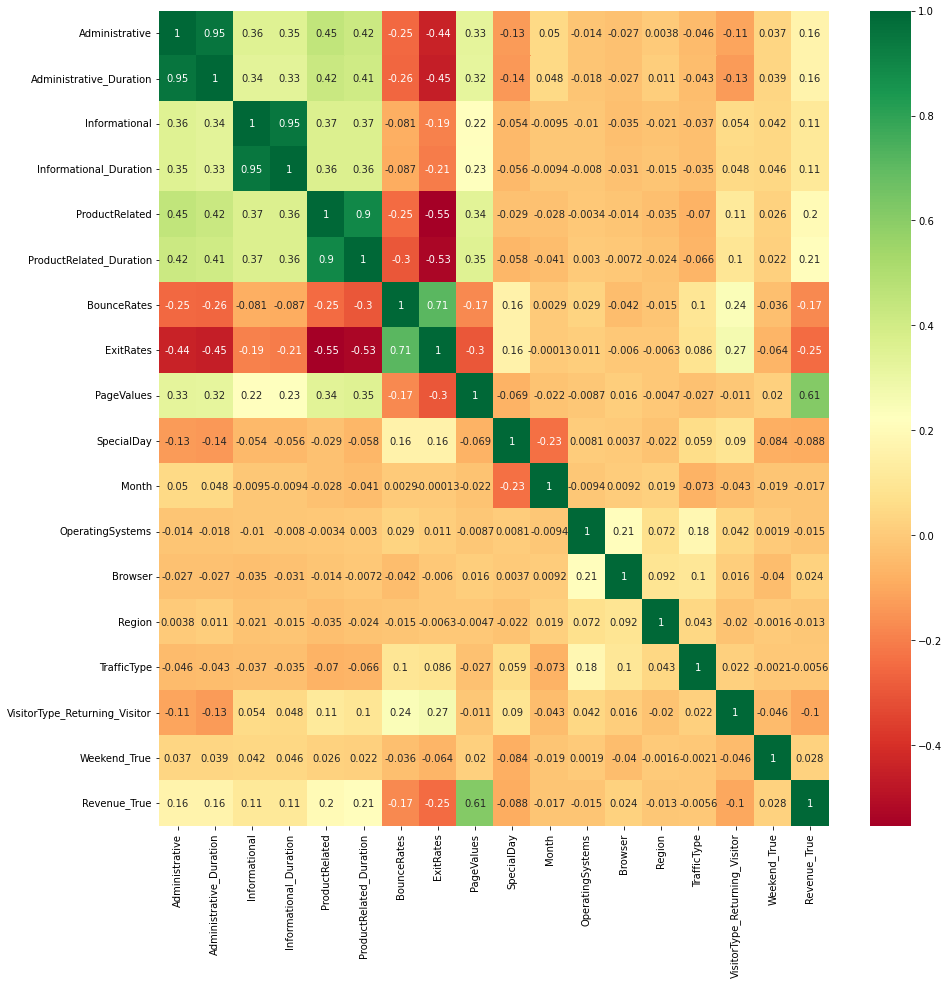

In [26]:
corrmat = df.loc[:, df.columns != 'revenue'].corr()
top_corr_features = corrmat.index 

plt.figure(figsize=(15,15)) 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Pada tahap feature selection ini fitur yang redundant adalah :
- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>
- BounceRates - ExitRates <br>

- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>

ketiganya akan dibuat feature extraction untuk mendapatkan durasi tiap page nya, sedangkan BounceRates - ExitRates, akan dipilih salah satu, yaitu ExitRates 


### **E ) Feature Extraction**

In [27]:
# memilih feature dengn korelasi tinggi dengan Revenue

x = corrmat['Revenue_True'] 
result = x[(x>0.05)|(x<-0.05)] # korelasi lebih dari 0.5
result

Administrative                   0.164376
Administrative_Duration          0.164306
Informational                    0.110966
Informational_Duration           0.107878
ProductRelated                   0.196981
ProductRelated_Duration          0.211123
BounceRates                     -0.172585
ExitRates                       -0.249863
PageValues                       0.611599
SpecialDay                      -0.088071
VisitorType_Returning_Visitor   -0.102694
Revenue_True                     1.000000
Name: Revenue_True, dtype: float64

In [28]:
df['Duration per Page Administrative'] = df['Administrative'] / df['Administrative_Duration']
df['Duration per Page Informational'] = df['Informational'] / df['Informational_Duration']
df['Duration per Page ProductRelated'] = df['ProductRelated'] / df['ProductRelated_Duration']

---

# **STAGE 3 - Modeling and Evaluation**

## **1. Split Dataset**
---

**Data yang dipilih**

In [29]:
df_selection=df[['ProductRelated', 'Duration per Page Administrative', 'Duration per Page Informational','ExitRates', 'PageValues','Revenue_True', 'VisitorType_Returning_Visitor', 'SpecialDay']]

In [30]:
df_selection.columns

Index(['ProductRelated', 'Duration per Page Administrative',
       'Duration per Page Informational', 'ExitRates', 'PageValues',
       'Revenue_True', 'VisitorType_Returning_Visitor', 'SpecialDay'],
      dtype='object')

In [65]:
X = df_selection[['ProductRelated', 'Duration per Page Administrative', 'Duration per Page Informational', 'ExitRates', 
                  'PageValues', 'VisitorType_Returning_Visitor', 'SpecialDay']].copy()

y = df_selection['Revenue_True'].copy()

In [32]:
# Split terlebih dahulu sebelum di oversampling
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
# Data Train Didapatkan oversampling dengan SMOTE
from imblearn import under_sampling, over_sampling
X_train, y_train = over_sampling.SMOTE(0.5).fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
0    7181
1    3590
Name: Revenue_True, dtype: int64


## **2. Modeling**
---

**Function Model**

In [34]:
# Fungsi Matrix Modeling

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

**Function Confussion Matrix**

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def c_matrix (model) :
  y_pred = model.predict(X_test)
  cf_matrix = confusion_matrix(y_test, y_pred)

  # mengatur matrix
  fig = plt.figure(figsize = (8,5))
  group_names = ['TRUE NEGATIF','FALSE POSITIF','FALSE NEGATIF','TRUE POSITIF']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  # display matrix
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 15})

### **A ) Logistic Regression**

**Fit Model Logistic Regression**

In [37]:
# logistic regression

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
eval_classification(logreg)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.79
Recall (Test Set): 0.80
Recall (Train Set): 0.80
F1-Score (Test Set): 0.66
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval test): 0.894494250715342
roc_auc (crossval train): 0.8950118975320989


**Cunfussion Matrix Logistic Regression**

Text(0.5, 1.0, 'Logistic Regression')

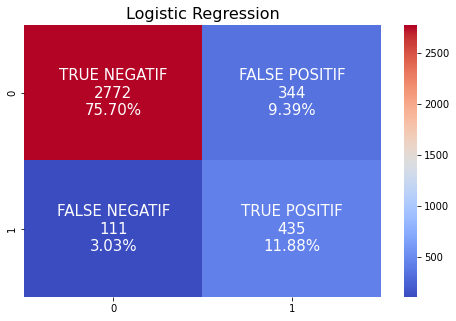

In [38]:
c_matrix(logreg)
plt.title('Logistic Regression', fontsize=16)

**Hyperparameter Tuning Logistic Regression**

In [39]:
# hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5, n_iter=50)
logreg_tuned.fit(X_train, y_train)
eval_classification(logreg_tuned)


Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.86
Precision (Test Set): 0.56
Precision (Train Set): 0.79
Recall (Test Set): 0.80
Recall (Train Set): 0.80
F1-Score (Test Set): 0.66
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89
roc_auc (crossval test): 0.893947701263178
roc_auc (crossval train): 0.894482886635776


**Confussion Matrix Hyperparameter Tuning Logistic Regression**

Text(0.5, 1.0, 'Logistic Regression - Tuning')

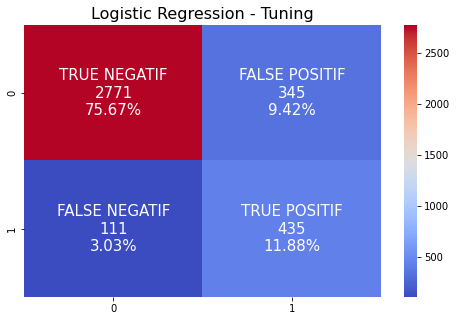

In [40]:
c_matrix(logreg_tuned)
plt.title('Logistic Regression - Tuning', fontsize=16)

**Learning Curve Logistic Regression**

param value: 0.0001; train: 0.8845787533567961; test: 0.8795320265955696
param value: 0.0006040404040404041; train: 0.8884123765166435; test: 0.8835688541240531
param value: 0.0011080808080808082; train: 0.8898906275031719; test: 0.8853245331903867
param value: 0.0016121212121212123; train: 0.8906500208108754; test: 0.886464813534775
param value: 0.002116161616161616; train: 0.8911547572730422; test: 0.8872512543083788
param value: 0.0026202020202020205; train: 0.8915065444675849; test: 0.88785548533623
param value: 0.0031242424242424243; train: 0.891796577861961; test: 0.8883139485674787
param value: 0.003628282828282828; train: 0.8920333136926251; test: 0.8886536815773016
param value: 0.004132323232323233; train: 0.8922354875660352; test: 0.8888970197538875
param value: 0.004636363636363637; train: 0.8924256753061215; test: 0.8891703343725167
param value: 0.0051404040404040416; train: 0.892567220291554; test: 0.8893842838804329
param value: 0.005644444444444445; train: 0.892703063135

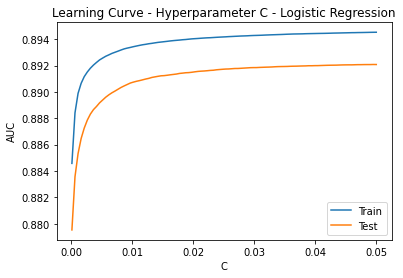

In [41]:
# learning curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

### **B ) KNN**

**Fit Model KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.91
Precision (Test Set): 0.51
Precision (Train Set): 0.84
Recall (Test Set): 0.71
Recall (Train Set): 0.91
F1-Score (Test Set): 0.60
F1-Score (Train Set): 0.88
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.98
roc_auc (crossval test): 0.9313407448705859
roc_auc (crossval train): 0.9725470524309626


**Confussion Matrix KNN**

Text(0.5, 1.0, 'KNN')

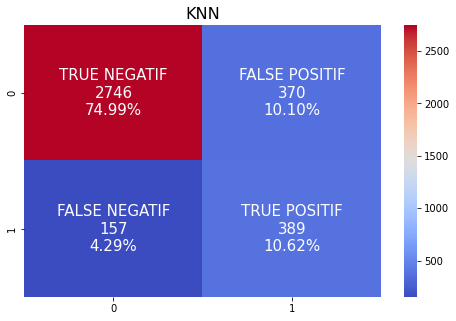

In [43]:
c_matrix(knn)
plt.title('KNN', fontsize=16)

**Hyperparameter Tuning KNN**

In [44]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
knn_tuned = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
knn_tuned.fit(X_train, y_train)
eval_classification(knn_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.91
Precision (Test Set): 0.56
Precision (Train Set): 0.87
Recall (Test Set): 0.65
Recall (Train Set): 0.85
F1-Score (Test Set): 0.60
F1-Score (Train Set): 0.86
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.97
roc_auc (crossval test): 0.9332499235955863
roc_auc (crossval train): 0.9670061046995393


**Confussion Matrix Hyperparameter Tuning KNN**

Text(0.5, 1.0, 'KNN - Tuning')

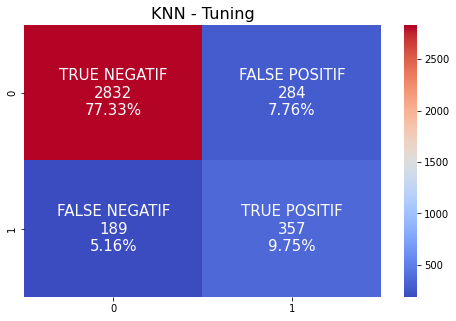

In [45]:
c_matrix(knn_tuned)
plt.title('KNN - Tuning', fontsize=16)

**Learning Curve KNN**

param value: 100; train: 0.922695006437213; test: 0.9173020496833078
param value: 101; train: 0.9225736128959933; test: 0.9174607484941246
param value: 102; train: 0.9223897673332481; test: 0.9172559094734962
param value: 103; train: 0.9223916292568713; test: 0.9174248943183474
param value: 104; train: 0.9221964763871235; test: 0.9173505409866128
param value: 105; train: 0.9221690130136824; test: 0.9173714069413684
param value: 106; train: 0.9220681976075058; test: 0.9175027742903223
param value: 107; train: 0.9219711642336885; test: 0.9175430367663999
param value: 108; train: 0.9219444184766439; test: 0.9175874136560915
param value: 109; train: 0.9219102250251068; test: 0.9175571433273615
param value: 110; train: 0.9217834202683575; test: 0.917439882539369
param value: 111; train: 0.9216931751577495; test: 0.917247386759582
param value: 112; train: 0.9215274833503299; test: 0.9170443110590735
param value: 113; train: 0.9214430761460818; test: 0.9170208001241376
param value: 114; train

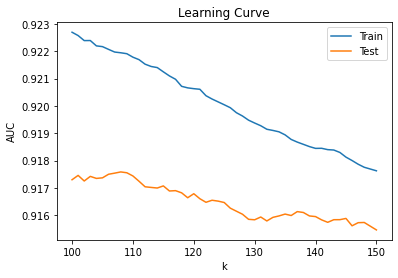

In [46]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(100, 150, 50)]
draw_learning_curve(param_values)

### **C ) Decision Tree**

**Fit Model Decision Tree**

In [47]:
# Fit Model Descision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 1.00
Precision (Test Set): 0.48
Precision (Train Set): 1.00
Recall (Test Set): 0.58
Recall (Train Set): 0.99
F1-Score (Test Set): 0.52
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.72
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.8287037670954487
roc_auc (crossval train): 0.9999482524826371


**Confussion Matrix**

Text(0.5, 1.0, 'Descision Tree')

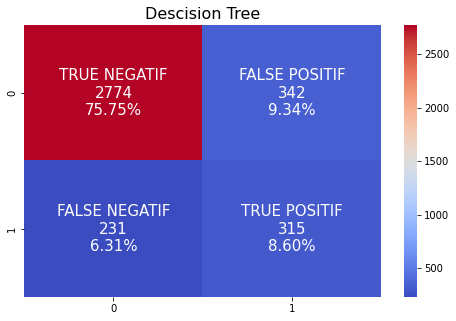

In [48]:
c_matrix(dt)
plt.title('Descision Tree', fontsize=16)

**Hyperparameter Tuning Decision Tree**

In [49]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#list hyperparameters
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2,5,10,100]
min_samples_leaf = [1,2,4,10,20,50]
max_features = ['auto','sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter)

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
dt_tuned.fit(X_train, y_train)

y_pred = dt_tuned.predict(X_test)
eval_classification(dt_tuned)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.95
Precision (Test Set): 0.59
Precision (Train Set): 0.96
Recall (Test Set): 0.62
Recall (Train Set): 0.87
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.92
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.99
roc_auc (crossval test): 0.8934935792700983
roc_auc (crossval train): 0.951170766717927


**Confussion Matrix Hyperparameter Tuning**

Text(0.5, 1.0, 'Decision Tree - Tuning')

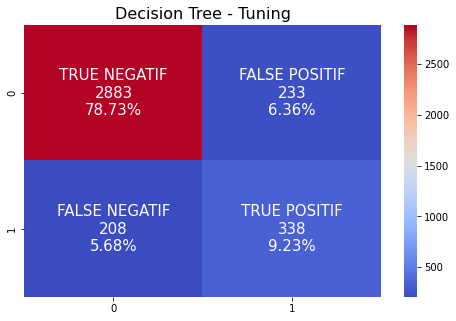

In [50]:
c_matrix(dt_tuned)
plt.title('Decision Tree - Tuning', fontsize=16)

**Feature Importance Decision Tree**

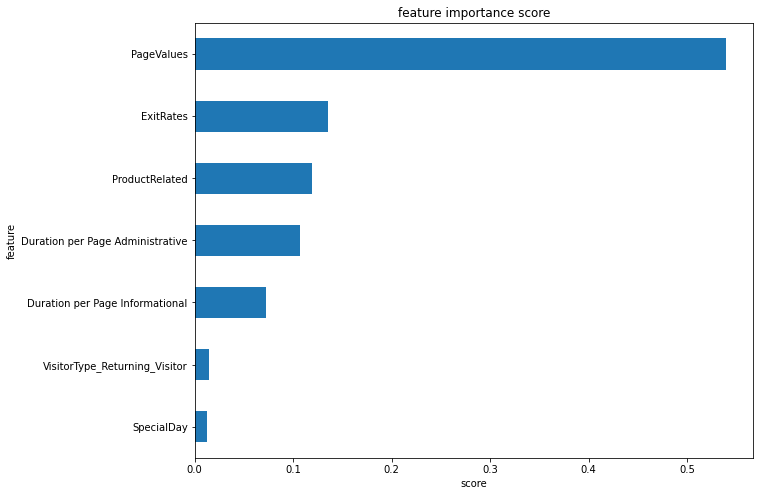

In [51]:
# feature importance
show_feature_importance(dt_tuned.best_estimator_)

### **D ) Random Forest**

**Fit Model Random Forest**

In [52]:
# Fit Model Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 1.00
Precision (Test Set): 0.57
Precision (Train Set): 1.00
Recall (Test Set): 0.68
Recall (Train Set): 0.99
F1-Score (Test Set): 0.62
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.9523108760673893
roc_auc (crossval train): 0.9991265422525654


Masih terlalu overfitting

**Confussion Matrix Random Forest**

Text(0.5, 1.0, 'Random Forest')

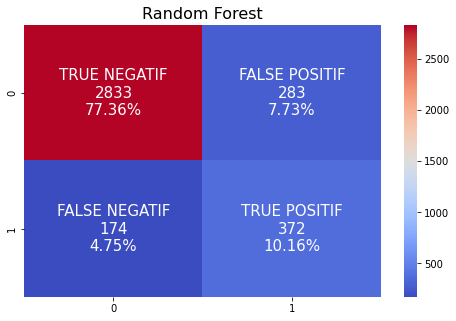

In [53]:
c_matrix(rf)
plt.title('Random Forest', fontsize=16)

**Hyperparamete Tuning Random Forest**

In [54]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators = [int(x) for x in np.linspace(125, 200, 15)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.arange(3, 5)]
min_samples_split = [int(x) for x in np.linspace(1000, 1200 ,20)]
min_samples_leaf = [int(x) for x in np.linspace(200, 300, 20)] # min_samples_leaf
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring = 'roc_auc')
rf_tuned.fit(X_train, y_train)
eval_classification(rf_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.55
Precision (Train Set): 0.79
Recall (Test Set): 0.78
Recall (Train Set): 0.80
F1-Score (Test Set): 0.64
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.91
roc_auc (crossval test): 0.9062439160010787
roc_auc (crossval train): 0.9097623086466227


**Confussion Matrix Hyperparameter Tuning Random Forest**

Text(0.5, 1.0, 'Random Forest - Tuning')

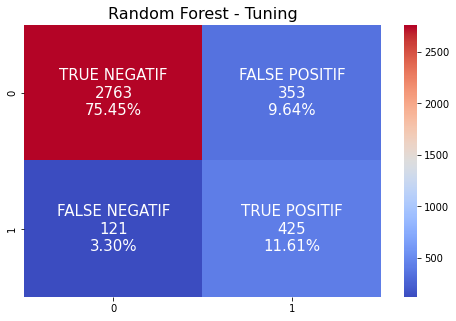

In [55]:
c_matrix(rf_tuned)
plt.title('Random Forest - Tuning', fontsize=16)

**Feature Importance Random Forest**

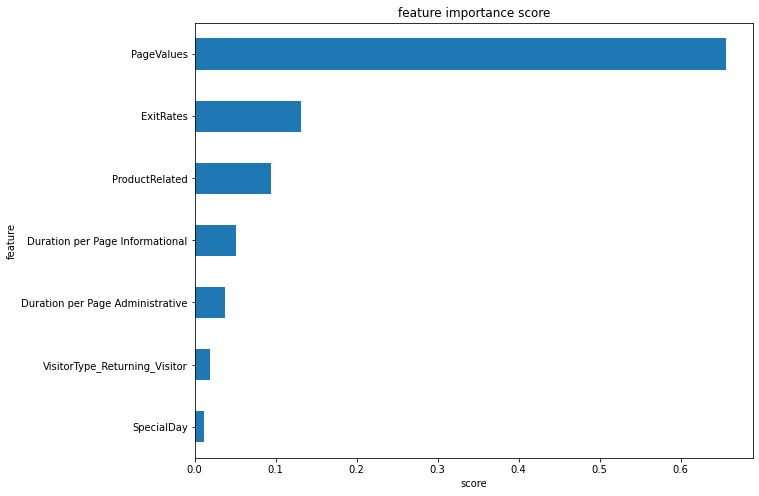

In [56]:
show_feature_importance(rf_tuned.best_estimator_)

**Learning Curve Random Forest**

param value: 125; train: 0.9112749754749748; test: 0.8956884471967912
param value: 130; train: 0.9106820497762007; test: 0.8960590383087175
param value: 135; train: 0.9067207490829057; test: 0.8905404341059027
param value: 141; train: 0.908863493457472; test: 0.8910182938584736
param value: 146; train: 0.9065253634727048; test: 0.8904895917091039
param value: 151; train: 0.9077918594371793; test: 0.890973035308722
param value: 157; train: 0.9117950534119943; test: 0.8980080948148985
param value: 162; train: 0.9113137655504564; test: 0.8960663854758848
param value: 167; train: 0.9109918661090723; test: 0.897375944551811
param value: 173; train: 0.9087229182239266; test: 0.8927622174573394
param value: 178; train: 0.911465473535665; test: 0.8973042362002567
param value: 183; train: 0.910810949197026; test: 0.8958553748348357
param value: 189; train: 0.9098843318739214; test: 0.8952496743735511
param value: 194; train: 0.9104205658773791; test: 0.8948373513521138
param value: 200; train: 

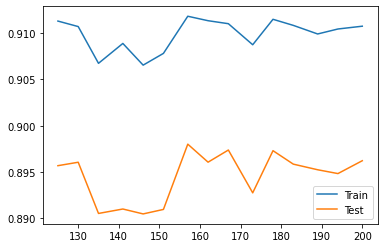

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(125, 200, 15)] # n_estimators

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators = c, max_depth=3)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### **E ) AdaBoost**

**Fit Model AdaBoost**

In [57]:
# Fit Model Adabost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.87
Precision (Test Set): 0.56
Precision (Train Set): 0.80
Recall (Test Set): 0.77
Recall (Train Set): 0.80
F1-Score (Test Set): 0.65
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.92
roc_auc (crossval test): 0.9164506950483909
roc_auc (crossval train): 0.9240465793648042


**Confussion Matrix AdaBoost**

Text(0.5, 1.0, 'AdaBoost')

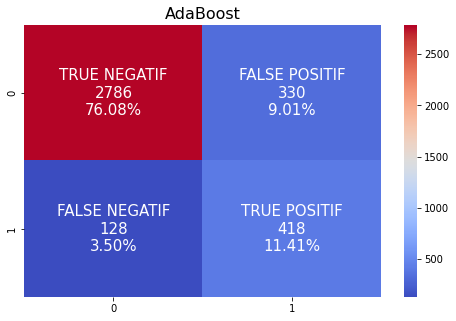

In [58]:
c_matrix(ada)
plt.title('AdaBoost', fontsize=16)

**Hyperparameter Tuning AdaBoost**

In [59]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ada = AdaBoostClassifier(random_state=42)
ada_tuned = RandomizedSearchCV(ada, hyperparameters, random_state=42, cv=5, scoring='recall')
ada_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ada_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.86
Precision (Test Set): 0.54
Precision (Train Set): 0.78
Recall (Test Set): 0.81
Recall (Train Set): 0.82
F1-Score (Test Set): 0.65
F1-Score (Train Set): 0.80
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.89
roc_auc (crossval test): 0.8862706616090106
roc_auc (crossval train): 0.8905736860586115


**Confussion Matrix Hyperparameter Tuning AdaBoost**

Text(0.5, 1.0, 'AdaBoost - Tuning')

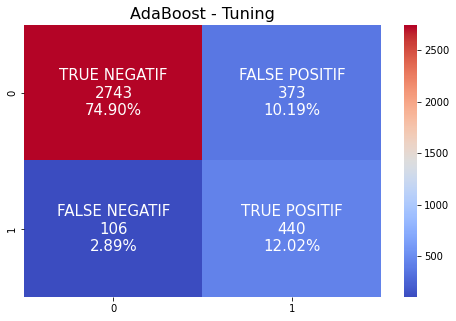

In [60]:
c_matrix(ada_tuned)
plt.title('AdaBoost - Tuning', fontsize=16)

**Feature Importance**

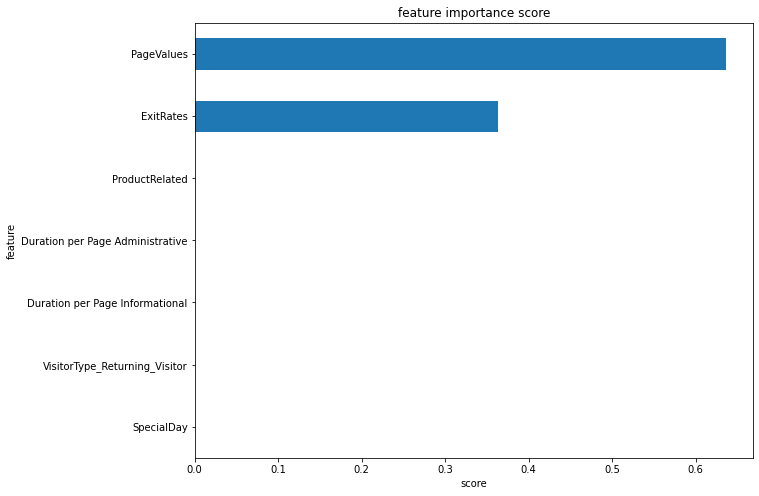

In [61]:
show_feature_importance(ada_tuned.best_estimator_)

### **F ) XgBoost**

**Fit Model XgBoost**

In [62]:
# Fit Model XgBoost
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.88
Precision (Test Set): 0.57
Precision (Train Set): 0.82
Recall (Test Set): 0.78
Recall (Train Set): 0.84
F1-Score (Test Set): 0.66
F1-Score (Train Set): 0.83
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.94
roc_auc (crossval test): 0.930493125568187
roc_auc (crossval train): 0.9411180407711808


**Confussion Matrix XgBoost**

Text(0.5, 1.0, 'XGBoost - Tuning')

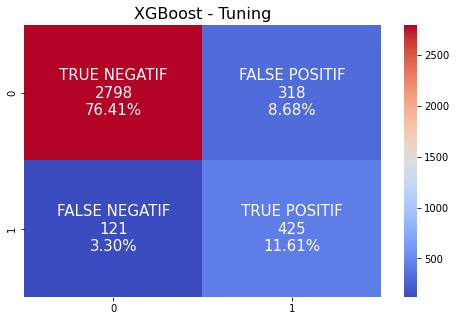

In [63]:
c_matrix(xg)
plt.title('XGBoost - Tuning', fontsize=16)

**Hyperparameter tuning XgBoost**

In [64]:
# Hiperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.88
Accuracy (Train Set): 0.99
Precision (Test Set): 0.59
Precision (Train Set): 0.99
Recall (Test Set): 0.65
Recall (Train Set): 0.97
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.89
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.94903155728391
roc_auc (crossval train): 0.9981706135606224


**Confussion Matrix Hyperparameter Tuning XgBoost**

Text(0.5, 1.0, 'XGBoost - Tuning')

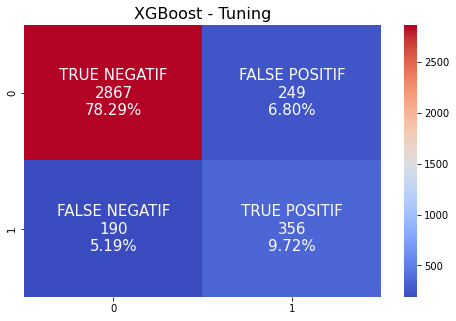

In [66]:
c_matrix(xg_tuned)
plt.title('XGBoost - Tuning', fontsize=16)

**Feature Importance**

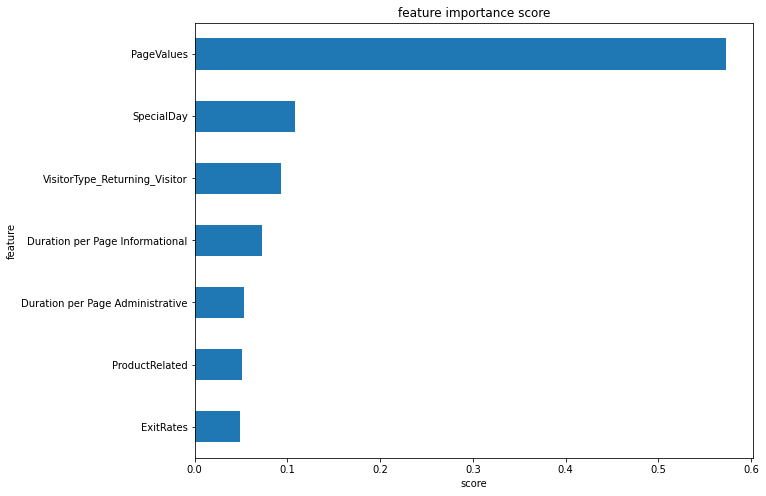

In [67]:
show_feature_importance(xg_tuned.best_estimator_)

## **3. Shap Value Model Random Forest**
---

Dari perbandingan matriks evaluasi data train test dari beberapa algiritma model yang telah dilakukan, Random Forest dengan Hyperparameter tuning dipilih sebagai model untuk diterapkan dengan ROC AUC 90%. Nilai matriks ini sudah cukup baik digunakan untuk memisahkan customer yang diprediksi akan melakukan pembelian atau tidak di E-commerce.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 18.4 MB/s eta 0:00:00


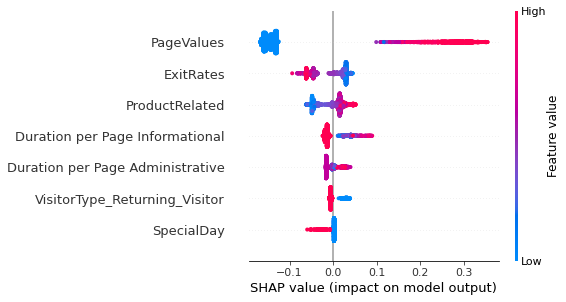

In [ ]:
import shap

model = RandomForestClassifier(n_estimators=125, max_depth=3)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive
